In [1]:
from fluid_sim import Fluid
import matplotlib.pyplot as plt
import numpy as np

In [2]:
fluid = Fluid(1, 64,64,1, 1.0)
fluid.initialize()

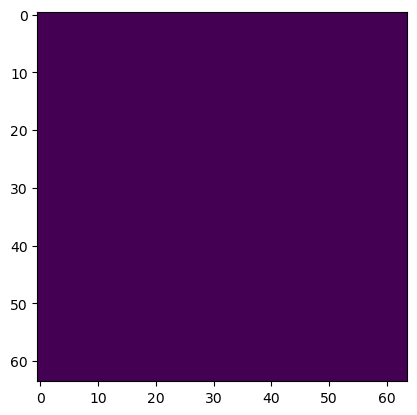

In [3]:
plt.imshow(np.rot90(fluid.p))

In [4]:
fluid.set_obstacle(fluid.num_x // 2, fluid.num_y // 2, 1 / 30)
fluid.simulate(1/30, -9.81, 40)

In [ ]:
# fluid.simulate(1/30, -9.81, 40)

In [5]:
fluid.integrate(1/30, -9.81)
fluid.p = np.zeros((fluid.num_x, fluid.num_y))

In [6]:
v = fluid.v.copy()
u = fluid.u.copy()

new_u = u.copy()
new_v = v.copy()

for i in range(63):
    for j in range(63):
        new_u[i,j] = (u[i,j] + u[i+1, j]) / 2
        new_v[i,j] = (v[i,j] + v[i, j+1]) / 2

In [7]:
fluid.solve_incomressibility(40, 1/30)

In [ ]:
fluid.extrapolate()
fluid.advect_vel(1/30)
fluid.advect_smoke(1/30)

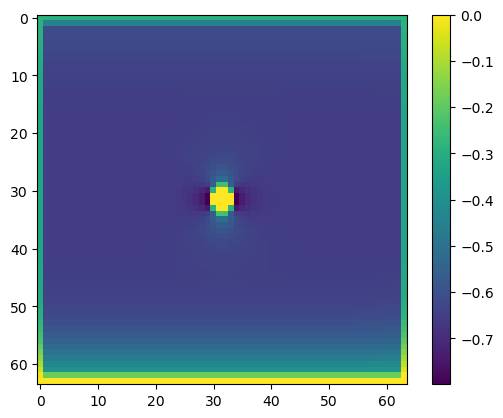

In [8]:
plt.imshow(np.rot90(new_v))
plt.colorbar()
plt.show()

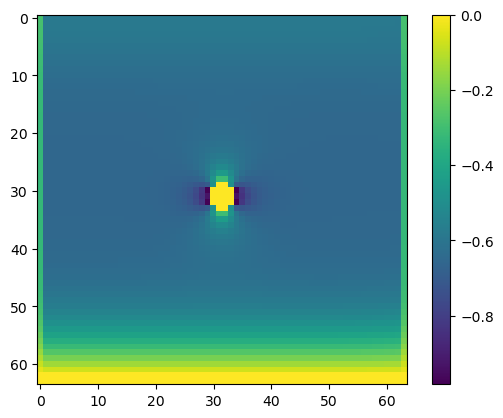

In [9]:
plt.imshow(np.rot90(fluid.v))
plt.colorbar()
plt.show()

In [10]:
# /delta^2 p = d^2p / dx^2 + d^2p / dy^2
lagrangian_p = np.zeros((64,64))
for i in range(1,63):
    for j in range(1, 63):
        lagrangian_p[i,j] = (fluid.p[i+1][j] - fluid.p[i-1][j] - 2*fluid.p[i][j]) + (fluid.p[i, j+1] - fluid.p[i, j-1] - 2*fluid.p[i][j] )
        # lagrangian_p

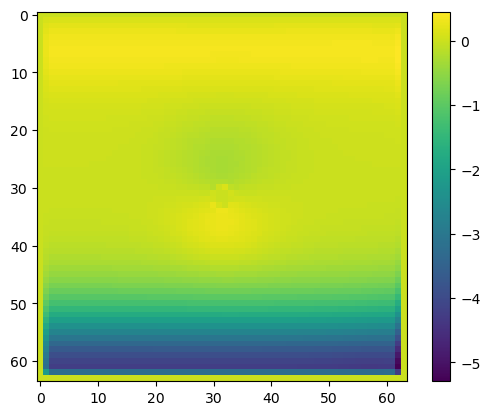

In [11]:
plt.imshow(np.rot90(lagrangian_p))
plt.colorbar()
plt.show()

In [ ]:
lagrangian_p

In [ ]:
g

In [ ]:
du_dx = np.zeros((64,64))
dv_dy = np.zeros((64,64))
du_dy = np.zeros((64,64))
dv_dx = np.zeros((64,64))
for i in range(1,63):
    for j in range(1, 63):
        du_dx[i,j] = (fluid.u[i+1][j] - fluid.u[i-1][j]) / 2
        dv_dy[i,j] = (fluid.v[i][j+1] -  fluid.v[i][j-1]) / 2
        du_dy[i,j] = (new_u[i][j] - new_u[i][j-1])
        dv_dx[i,j] = (new_v[i][j] - new_v[i-1][j])

In [12]:
g = np.zeros((64,64))
for i in range(1,63):
    for j in range(1, 63):
        # g[i,j] = - (du_dx[i,j]**2 + dv_dy[i,j]**2 + 2*du_dy[i,j]*dv_dx[i,j])
        g[i, j] = 30 * ((new_u[i+1][j]  -  new_u[i-1][j]) / 2 + (new_v[i,j+1] - new_v[i, j-1]) / 2)

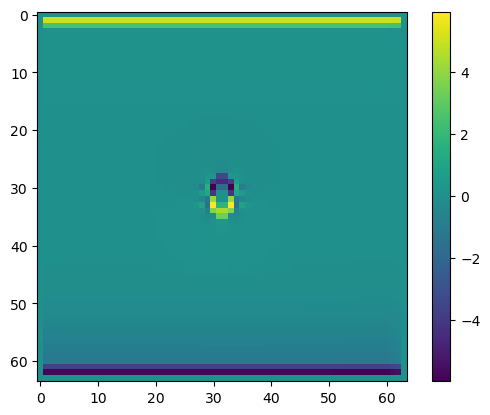

In [13]:
plt.imshow(np.rot90(g))
plt.colorbar()
plt.show()

In [ ]:
plt.imshow(np.rot90(fluid.p))

In [ ]:
delta_p_x = np.zeros((64,64))
delta_p_y = np.zeros((64,64))
for i in range(1,63):
    for j in range(1,63):
        delta_p_x[i,j] = fluid.p[i, j] - fluid.p[i-1,j]
        delta_p_y[i,j] = fluid.p[i, j] - fluid.p[i,j-1]

In [ ]:
plt.imshow(np.rot90(v - delta_p_y ))

In [ ]:
g[30:36, 30:36]

In [ ]:
lagrangian_p[30:36, 30:36]